In [1]:
df_raw <- read.csv("googleplaystore.csv")
df_review <- read.csv("googleplaystore_user_reviews.csv")

In [2]:
t <- !is.nan(df_review$Sentiment_Polarity)
df_review2 <- subset(df_review, t)
df_2 <- subset(df_raw, !duplicated(df_raw$App))
row.names(df_2) <- df_2$App

In [3]:
for (app in unique(df_review2$App)) {
    s <- subset(df_review2, df_review2$App == app)
    df_2[app, "sentiment_polarity_mean"] <- mean(s$Sentiment_Polarity)
    df_2[app, "sentiment_subjectivity_mean"] <- mean(s$Sentiment_Subjectivity)
    df_2[app, "positive"] <- sum(s$Sentiment == "Positive")
    df_2[app, "negative"] <- sum(s$Sentiment == "Negative")
    df_2[app, "neutral"] <- sum(s$Sentiment == "Neutral")
}

In [4]:
df <- subset(df_2, !is.na(df_2$sentiment_polarity_mean))
df <- subset(df, !is.na(df$Category))

In [5]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver,sentiment_polarity_mean,sentiment_subjectivity_mean,positive,negative,neutral
Coloring book moana,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.15265152,0.6415404,26,14,4
Garden Coloring Book,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0.26848289,0.5234474,64,10,16
FlipaClip - Cartoon animation,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,0.41264881,0.6792262,4,0,0
Boys Photo Editor - Six Pack & Men's Suit,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up,0.28350877,0.4792982,23,5,10
Colorfit - Drawing & Coloring,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up,0.17183595,0.5727620,29,8,1
Animated Photo Editor,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1M,"100,000+",Free,0,Everyone,Art & Design,"March 21, 2018",1.03,4.0.3 and up,0.29185714,0.5463651,21,4,10
Anime Manga Coloring Book,Anime Manga Coloring Book,ART_AND_DESIGN,4.5,5035,11M,"100,000+",Free,0,Everyone,Art & Design,"July 19, 2018",2.20,4.0 and up,0.36099077,0.5071181,19,3,2
Easy Origami Ideas,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up,0.09945261,0.5367647,17,11,6
Floor Plan Creator,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,0.26461548,0.4655839,26,3,8
"Canva: Poster, banner, card maker & graphic design","Canva: Poster, banner, card maker & graphic design",ART_AND_DESIGN,4.7,174531,24M,"10,000,000+",Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up,0.20483957,0.5360010,30,3,5


In [10]:
df$positiveRate <- df$positive/(df$negative+df$neutral+df$positive)
df$negativeRate <- df$negative/(df$negative+df$neutral+df$positive)
df$neutralRate <- df$neutral/(df$negative+df$neutral+df$positive)

In [11]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,...,Current.Ver,Android.Ver,sentiment_polarity_mean,sentiment_subjectivity_mean,positive,negative,neutral,positiveRate,negativeRate,neutralRate
Coloring book moana,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,0.15265152,0.6415404,26,14,4,0.5909091,0.31818182,0.09090909
Garden Coloring Book,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,...,2.9.2,3.0 and up,0.26848289,0.5234474,64,10,16,0.7111111,0.11111111,0.17777778
FlipaClip - Cartoon animation,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,...,2.2.5,4.0.3 and up,0.41264881,0.6792262,4,0,0,1.0000000,0.00000000,0.00000000
Boys Photo Editor - Six Pack & Men's Suit,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,...,1.1,4.0.3 and up,0.28350877,0.4792982,23,5,10,0.6052632,0.13157895,0.26315789
Colorfit - Drawing & Coloring,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,...,1.0.8,4.0.3 and up,0.17183595,0.5727620,29,8,1,0.7631579,0.21052632,0.02631579
Animated Photo Editor,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1M,"100,000+",Free,0,Everyone,Art & Design,...,1.03,4.0.3 and up,0.29185714,0.5463651,21,4,10,0.6000000,0.11428571,0.28571429
Anime Manga Coloring Book,Anime Manga Coloring Book,ART_AND_DESIGN,4.5,5035,11M,"100,000+",Free,0,Everyone,Art & Design,...,2.20,4.0 and up,0.36099077,0.5071181,19,3,2,0.7916667,0.12500000,0.08333333
Easy Origami Ideas,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,...,1.1.0,4.1 and up,0.09945261,0.5367647,17,11,6,0.5000000,0.32352941,0.17647059
Floor Plan Creator,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,...,Varies with device,2.3.3 and up,0.26461548,0.4655839,26,3,8,0.7027027,0.08108108,0.21621622
"Canva: Poster, banner, card maker & graphic design","Canva: Poster, banner, card maker & graphic design",ART_AND_DESIGN,4.7,174531,24M,"10,000,000+",Free,0,Everyone,Art & Design,...,1.6.1,4.1 and up,0.20483957,0.5360010,30,3,5,0.7894737,0.07894737,0.13157895


In [12]:
write.csv(df, "modified_dataset.csv")

In [26]:
library("BayesTree")

In [46]:
smp_size <- floor(0.70 * nrow(df))

train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]
y_test <- test$Rating
y_train <- train$Rating
X_train <- train[c("positiveRate", "negativeRate", "neutralRate")]
X_test <- test[c("positiveRate", "negativeRate", "neutralRate")]

In [48]:
?bart

In [49]:
library(bartMachine)

Loading required package: rJava
Error: package or namespace load failed for 'rJava':
 package 'rJava' was installed by an R version with different internals; it needs to be reinstalled for use with this R version


ERROR: Error: package 'rJava' could not be loaded


In [98]:
b <- bart(x.train = X_train, y.train = y_train, x.test = X_test, ntree = 200)



Running BART with numeric y

number of trees: 200
Prior:
	k: 2.000000
	degrees of freedom in sigma prior: 3
	quantile in sigma prior: 0.900000
	power and base for tree prior: 2.000000 0.950000
	use quantiles for rule cut points: 0
data:
	number of training observations: 571
	number of test observations: 245
	number of explanatory variables: 3


Cutoff rules c in x<=c vs x>c
Number of cutoffs: (var: number of possible c):
(1: 100) (2: 100) (3: 100) 


Running mcmc loop:
iteration: 100 (of 1100)
iteration: 200 (of 1100)
iteration: 300 (of 1100)
iteration: 400 (of 1100)
iteration: 500 (of 1100)
iteration: 600 (of 1100)
iteration: 700 (of 1100)
iteration: 800 (of 1100)
iteration: 900 (of 1100)
iteration: 1000 (of 1100)
iteration: 1100 (of 1100)
time for loop: 33

Tree sizes, last iteration:
4 4 3 2 1 3 3 2 2 3 2 2 2 2 2 5 2 2 2 2 
1 3 2 3 2 1 2 2 2 2 2 2 3 3 2 2 2 3 3 3 
2 2 3 3 4 3 2 3 2 2 2 3 5 2 2 3 3 2 3 2 
2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 2 4 3 2 1 
2 2 4 2 2 2 2 2 2 2 2 3 2 4 2 3 3 2 

In [55]:
?bart

In [73]:
mean(b$yhat.test.mean)

[1] 4.282373

In [74]:
mean(y_test)

[1] 4.318776

In [99]:
SSE_200 <- sum((b$yhat.test.mean-y_test)^2)

In [100]:
SSE_200
SSE_300

[1] 15.76773

[1] 15.71713

In [102]:
round(b$yhat.test.mean[1:10],1)
y_test[1:10]

[1] 4.2 4.4 4.3 4.4 3.8 4.2 4.2 4.3 4.2 4.0

[1] 3.9 4.9 4.6 4.6 3.9 4.0 4.4 4.5 4.2 4.2

In [86]:
?bart

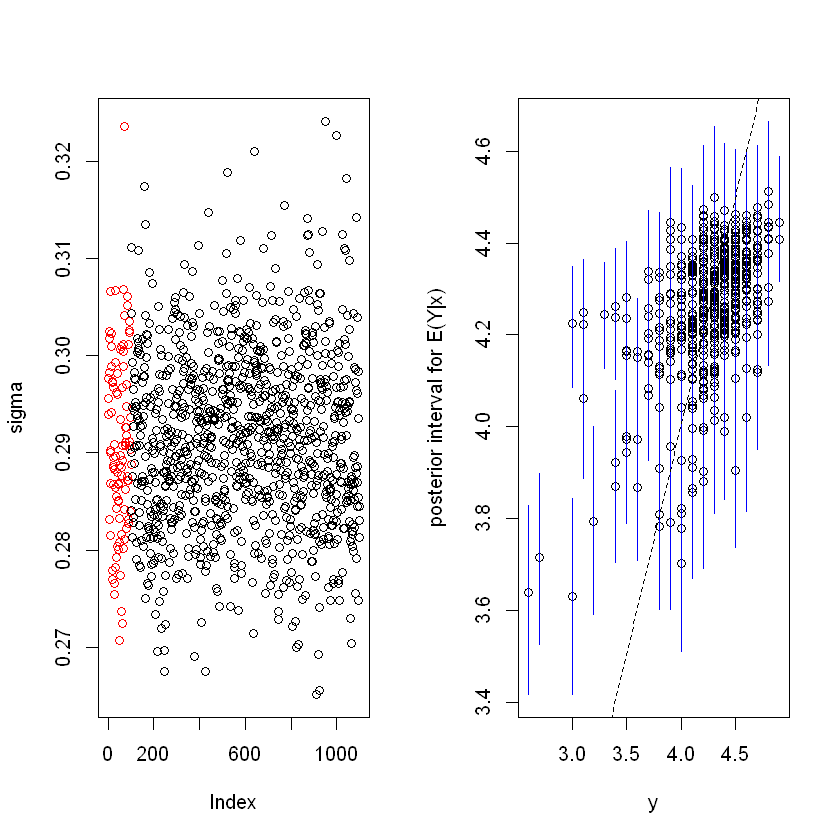

In [89]:
plot.bart(b)

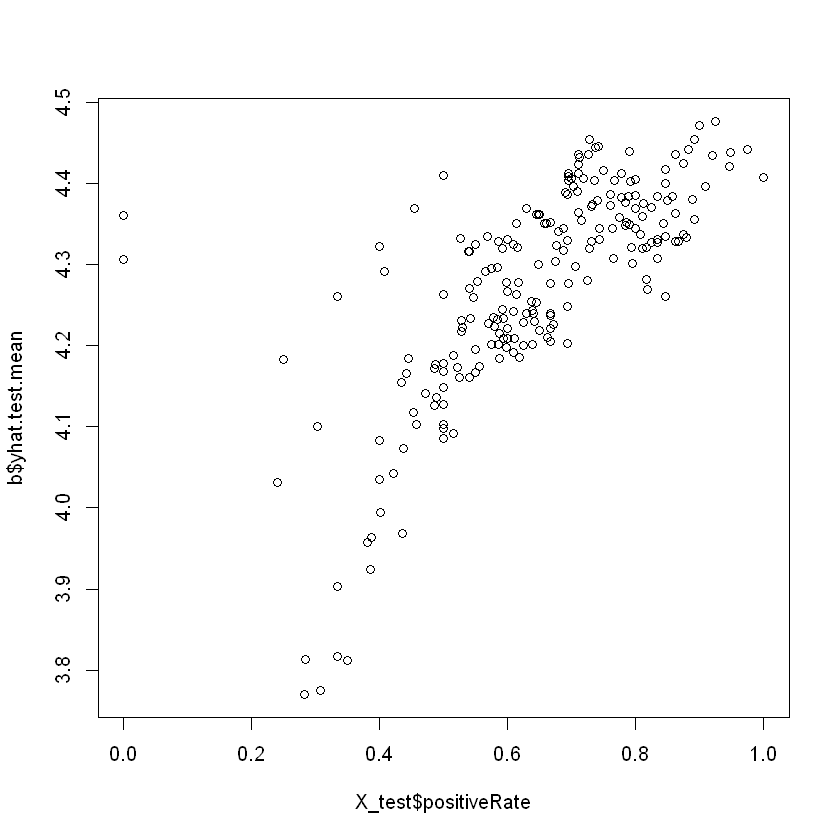

In [97]:
plot(X_test$positiveRate, b$yhat.test.mean)

In [92]:
length(X_test$positiveRate)
length(b$yhat.test)

[1] 245

[1] 245000

In [93]:
length(b$yhat.test.mean)

[1] 245